In [1]:
import functools
import logging
import pprint

import PIL.Image
import graphcat.notebook
import numpy

import imagecat.notebook

logging.basicConfig(level=logging.DEBUG)

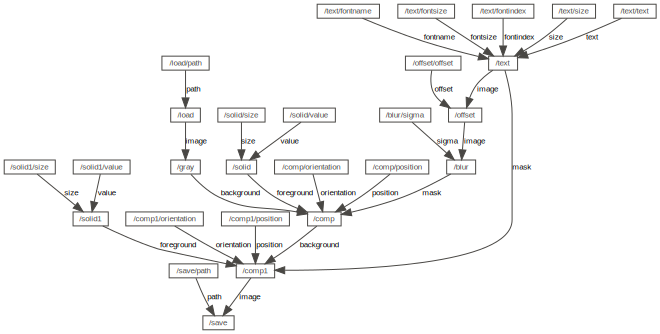

INFO:imagecat:Task /solid1 solid C size [500 200] value [1.   0.75 0.  ] result C(500x200x3 float16)
INFO:imagecat:Task /solid solid C size [500 200] value [0 0 0] result C(500x200x3 float16)
DEBUG:imagecat.io:{'srgb': 1, 'Artist': 'tshead', 'Comment': 'none'}
INFO:imagecat:Task /load load ../artwork/logo.png result C(2560x1440x3 float16) A(2560x1440x1 float16)
INFO:imagecat:Task /text text anchor mm fontindex 4 fontname HelveticaNeue fontsize 96 plane A position ('0.5vw', '0.5vh') size [500 200] result A(500x200x1 float16)
INFO:imagecat:Task /offset offset ('5px', '6px') * result A(500x200x1 float16)
INFO:imagecat:Task /blur gaussian * 4px result A(500x200x1 float16)
INFO:imagecat:Task /comp comp C(500x200x3 float16) over C(2560x1440x3 float16) mask A(500x200x1 float16) orientation 30.0 position ('0.25vw', '0.4vh') result C(2560x1440x3 float16)
INFO:imagecat:Task /comp1 comp C(500x200x3 float16) over C(2560x1440x3 float16) mask A(500x200x1 float16) orientation 30.0 position ('0.25vw',


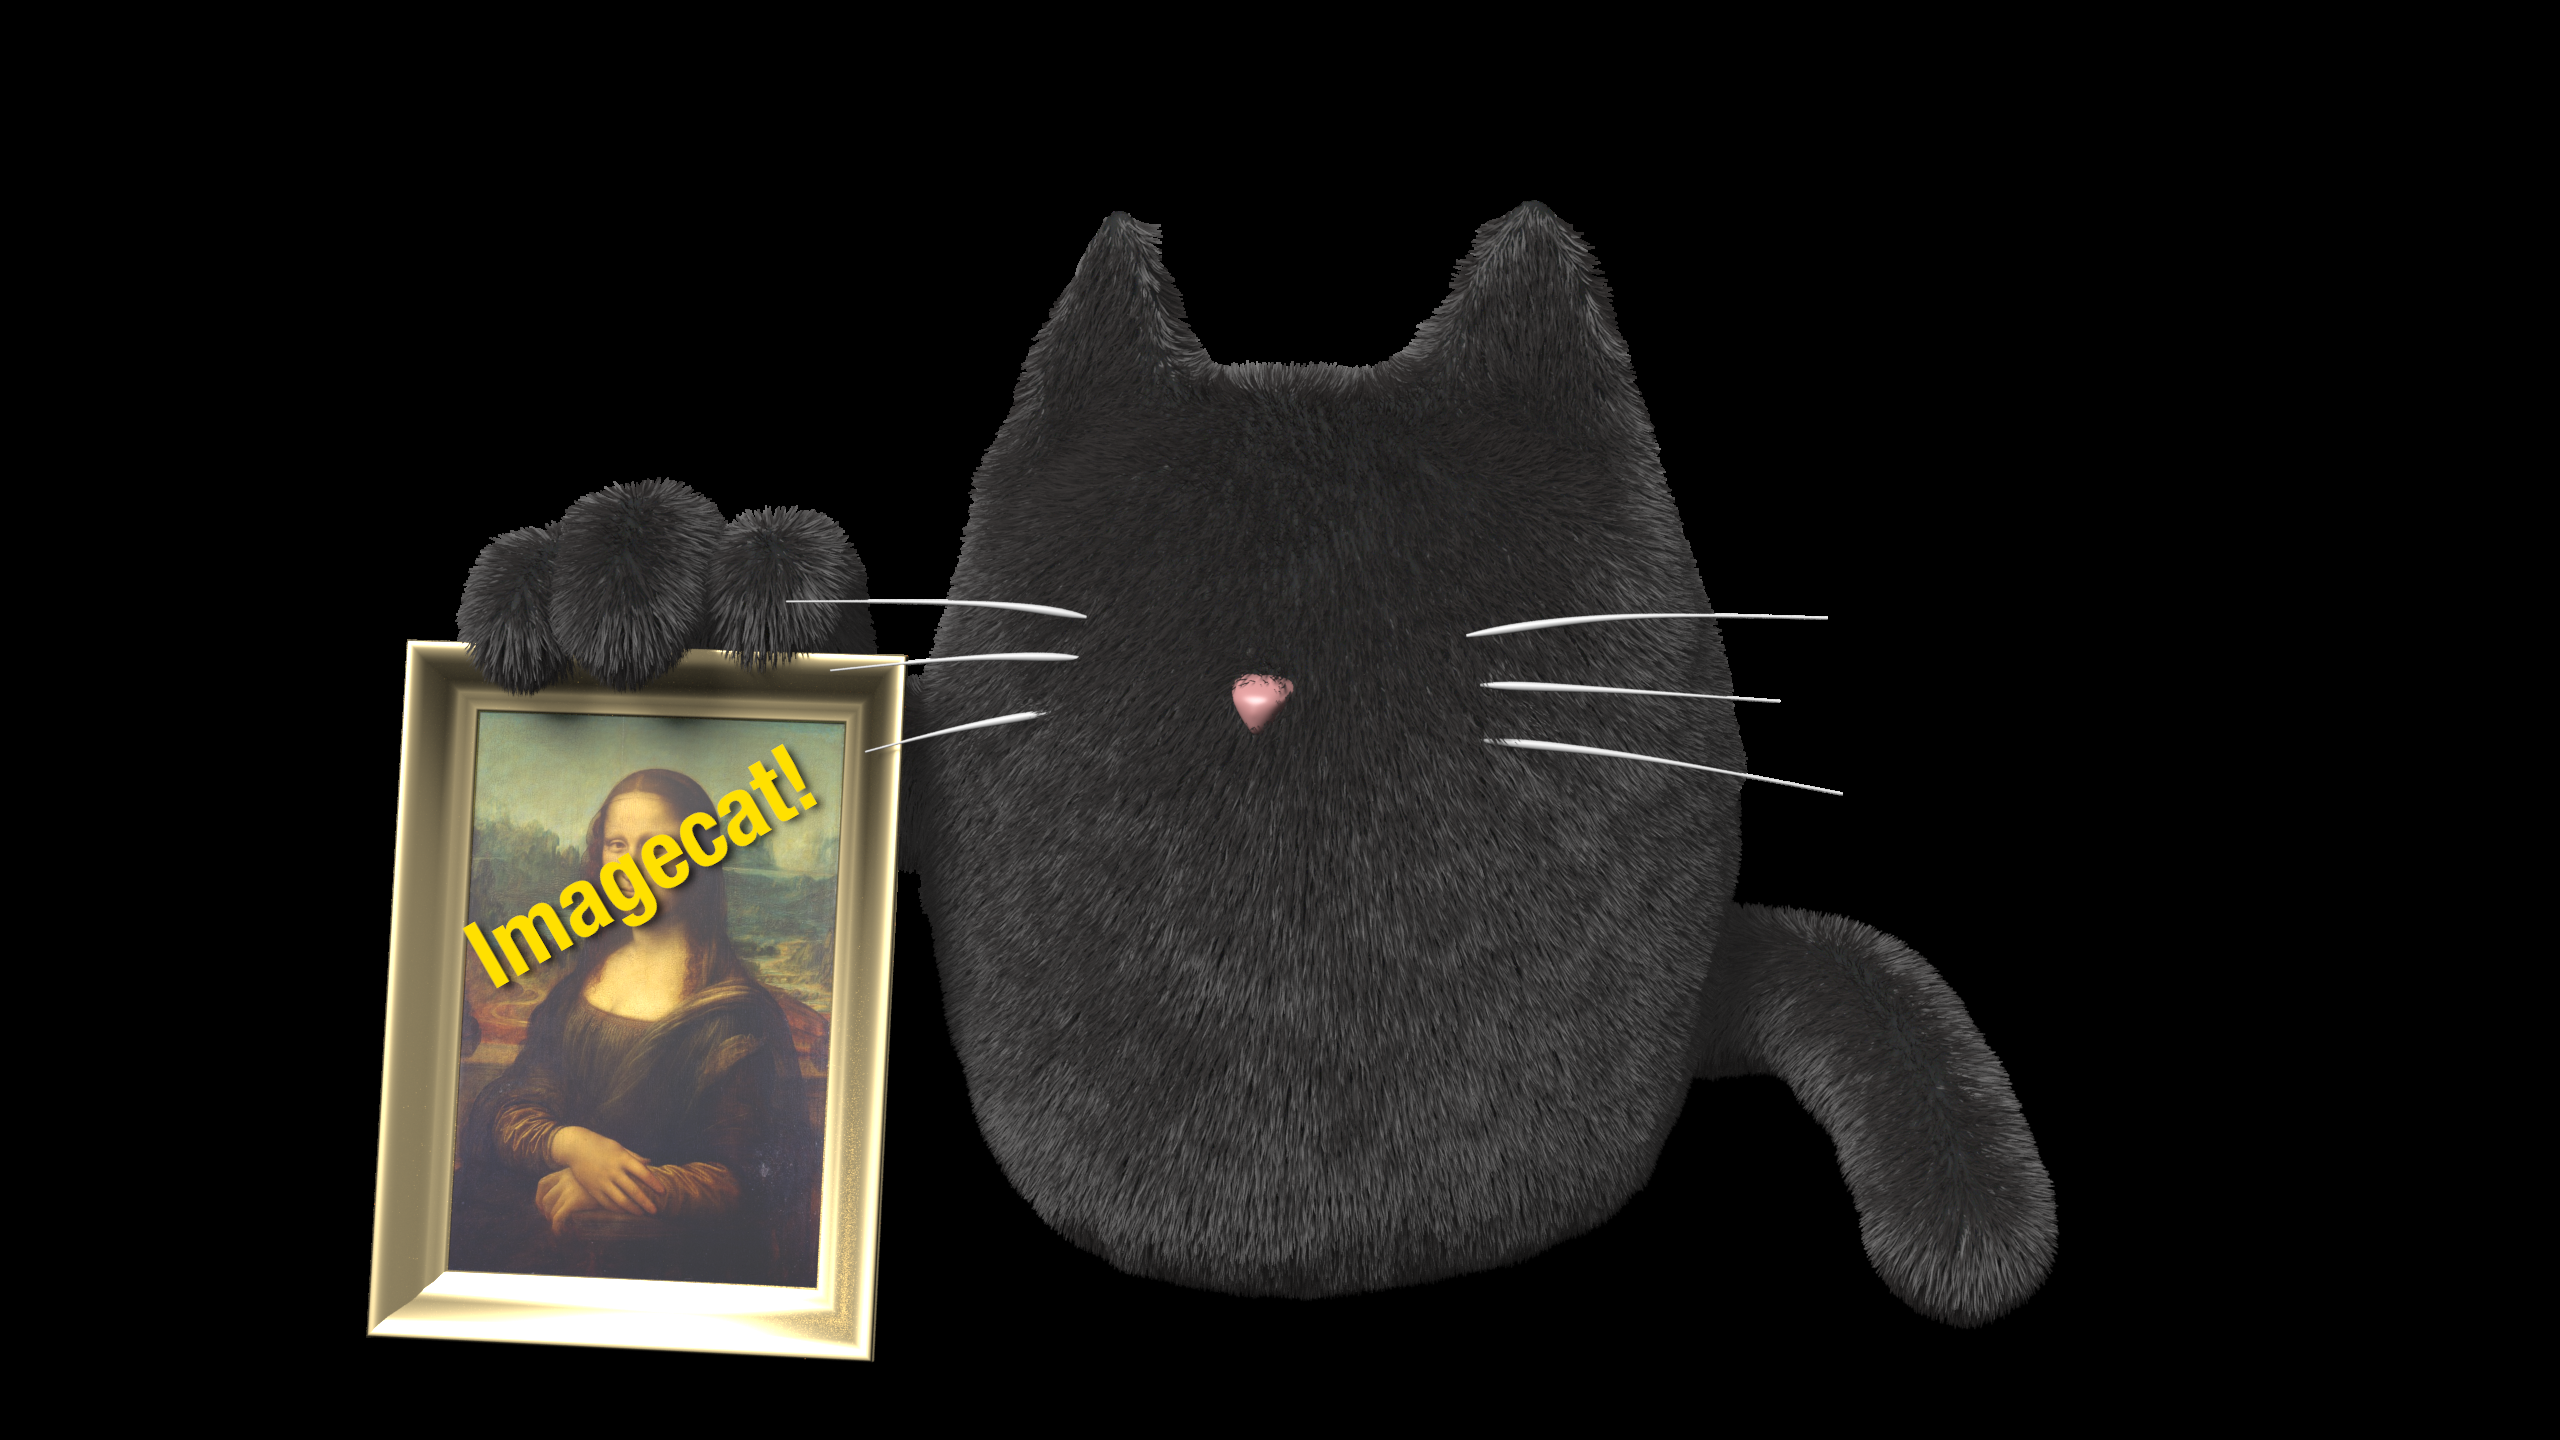

In [14]:
graph = graphcat.Graph()

text = imagecat.add_operation(graph, "/text", imagecat.text, fontname="HelveticaNeue", fontsize=96, fontindex=4, size=(500, 200), text="Imagecat!")
offset = imagecat.add_operation(graph, "/offset", imagecat.offset, offset=("5px", "6px"))
blur = imagecat.add_operation(graph, "/blur", imagecat.gaussian, sigma="4px")
graph.add_links(text, (offset, "image"))
graph.add_links(offset, (blur, "image"))

file = imagecat.add_operation(graph, "/load", imagecat.load, path="../artwork/logo.png")
#gray = imagecat.add_operation(graph, "/gray", imagecat.rgb2gray)
gray = imagecat.add_operation(graph, "/gray", graphcat.passthrough("image"))
graph.set_links(file, (gray, "image"))

solid = imagecat.add_operation(graph, "/solid", imagecat.solid, size=(500, 200), value=[0, 0, 0])
comp = imagecat.add_operation(graph, "/comp", imagecat.composite, orientation=30, position=("0.25vw", "0.4vh"))
graph.set_links(solid, (comp, "foreground"))
graph.set_links(gray, (comp, "background"))
graph.set_links(blur, (comp, "mask"))

solid = imagecat.add_operation(graph, "/solid", imagecat.solid, size=(500, 200), value=[1, 0.75, 0])
comp2 = imagecat.add_operation(graph, "/comp", imagecat.composite, orientation=30, position=("0.25vw", "0.4vh"))
graph.set_links(solid, (comp2, "foreground"))
graph.set_links(comp, (comp2, "background"))
graph.add_links(text, (comp2, "mask"))

save = imagecat.add_operation(graph, "/save", imagecat.save, path="test.exr")
graph.add_links(comp2, (save, "image"))

graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output(comp2))


In [15]:
graph.update("/save")

DEBUG:imagecat.io:{'channels': {'C.r': HALF (1, 1), 'C.g': HALF (1, 1), 'C.b': HALF (1, 1)}, 'compression': ZIP_COMPRESSION, 'dataWindow': (0, 0) - (2559, 1439), 'displayWindow': (0, 0) - (2559, 1439), 'lineOrder': INCREASING_Y, 'pixelAspectRatio': 1.0, 'screenWindowCenter': (0.0, 0.0), 'screenWindowWidth': 1.0}


In [16]:
graph.set_task("/save/path", graphcat.constant("test.png"))
graph.update("/save")